<a href="https://colab.research.google.com/github/paulinap92/SQL-basics/blob/main/Turtles_%26_Tides_Spark_SQL_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Java (required by Spark)
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

# Download Apache Spark (Google mirror – works reliably in Colab)
!wget -q https://mirror.lyrahosting.com/apache/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

# Extract Spark archive
!tar xf spark-3.5.0-bin-hadoop3.tgz

# Install Python dependencies (PySpark + findspark helper)
!pip install -q pyspark findspark



In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Turtle_SQL_Challenge") \
    .config("spark.sql.repl.eagerEval.enabled", True) \
    .getOrCreate()

spark



# 🐢 Turtles & Tides — Spark Portfolio Project

**Goal:** Demonstrate SQL, PySpark DataFrame API, and pandas-on-Spark on a realistic marine-wildlife dataset  
**Technologies:** Apache Spark 3.5, PySpark, Google Colab, Matplotlib  
**Highlights:**
- Created 8 interrelated tables (`Beaches`, `Turtles`, `Sightings`, etc.) matching a real SQL schema  
- Queried data using Spark SQL, transformed it with the DataFrame API, and explored it using pandas-on-Spark  
- Added a simple visualization to summarize results  
**Key takeaway:** Same logic → three Spark paradigms → one unified engine.


In [ ]:
from pyspark.sql import Row

# Beaches
beaches = [
    Row(beach_id=1, beach_name="Las Canteras", island="Gran Canaria", protected_area=1),
    Row(beach_id=2, beach_name="Corralejo", island="Fuerteventura", protected_area=0),
    Row(beach_id=3, beach_name="Papagayo", island="Lanzarote", protected_area=1),
    Row(beach_id=4, beach_name="El Médano", island="Tenerife", protected_area=0),
]

# RehabStations
stations = [
    Row(station_id=1, station_name="Centro La Paz", island="Gran Canaria", capacity=12),
    Row(station_id=2, station_name="TurtleCare Sur", island="Tenerife", capacity=8),
]

# Turtles
turtles = [
    Row(turtle_id=1,species="Caretta caretta",tag_code="GC-001",sex="F",hatch_year=2015),
    Row(turtle_id=2,species="Chelonia mydas",tag_code="GC-002",sex="M",hatch_year=2018),
    Row(turtle_id=3,species="Caretta caretta",tag_code="FTV-010",sex="M",hatch_year=2012),
    Row(turtle_id=4,species="Eretmochelys imbricata",tag_code="LZ-007",sex="F",hatch_year=2010),
    Row(turtle_id=5,species="Caretta caretta",tag_code="TF-021",sex="F",hatch_year=2019),
    Row(turtle_id=6,species="Chelonia mydas",tag_code="TF-099",sex="M",hatch_year=2016),
]

# Sightings
sightings = [
    Row(sighting_id=1,turtle_id=1,beach_id=1,seen_at="2025-07-15 06:40",condition="healthy",observer="Alicia"),
    Row(sighting_id=2,turtle_id=2,beach_id=1,seen_at="2025-07-20 18:10",condition="entangled",observer="Luis"),
    Row(sighting_id=3,turtle_id=3,beach_id=2,seen_at="2025-08-02 09:05",condition="healthy",observer="Marta"),
    Row(sighting_id=4,turtle_id=4,beach_id=3,seen_at="2025-06-11 11:32",condition="injured",observer="Pablo"),
    Row(sighting_id=5,turtle_id=5,beach_id=4,seen_at="2025-08-21 07:55",condition="healthy",observer="Sara"),
    Row(sighting_id=6,turtle_id=6,beach_id=4,seen_at="2025-08-22 19:20",condition="healthy",observer="Sara"),
    Row(sighting_id=7,turtle_id=1,beach_id=2,seen_at="2025-08-25 06:30",condition="healthy",observer="Javier"),
    Row(sighting_id=8,turtle_id=2,beach_id=3,seen_at="2025-08-25 19:00",condition="entangled",observer="Luis"),
    Row(sighting_id=9,turtle_id=3,beach_id=1,seen_at="2025-09-01 08:15",condition="healthy",observer="Alicia"),
    Row(sighting_id=10,turtle_id=5,beach_id=4,seen_at="2025-09-05 17:40",condition="injured",observer="Diego"),
]

# Nests — różne plaże, różne sezony, ilości jaj i wylęgów
nests = [
    Row(nest_id=1, beach_id=1, season_year=2024, eggs_count=102, hatched_cnt=88),
    Row(nest_id=2, beach_id=1, season_year=2025, eggs_count=98, hatched_cnt=79),
    Row(nest_id=3, beach_id=2, season_year=2025, eggs_count=120, hatched_cnt=96),
    Row(nest_id=4, beach_id=3, season_year=2023, eggs_count=80, hatched_cnt=60),
    Row(nest_id=5, beach_id=3, season_year=2024, eggs_count=76, hatched_cnt=63),
    Row(nest_id=6, beach_id=3, season_year=2025, eggs_count=91, hatched_cnt=72),
    Row(nest_id=7, beach_id=4, season_year=2024, eggs_count=110, hatched_cnt=97),
    Row(nest_id=8, beach_id=4, season_year=2025, eggs_count=95, hatched_cnt=81),
    Row(nest_id=9, beach_id=2, season_year=2024, eggs_count=100, hatched_cnt=77),
    Row(nest_id=10, beach_id=1, season_year=2023, eggs_count=85, hatched_cnt=70),
]

# Rescues
rescues = [
    Row(rescue_id=1,turtle_id=2,station_id=1,rescue_date="2025-07-20",reason="entanglement"),
    Row(rescue_id=2,turtle_id=5,station_id=2,rescue_date="2025-09-06",reason="propeller injury"),
]

# Sensors
sensors = [
    Row(sensor_id=1,beach_id=1,sensor_type="tide",installed_at="2024-12-15"),
    Row(sensor_id=2,beach_id=4,sensor_type="tide",installed_at="2025-01-05"),
    Row(sensor_id=3,beach_id=4,sensor_type="temp",installed_at="2025-01-05"),
]

# SensorReadings
readings = [
    Row(sensor_id=1,ts="2025-08-20 06:00:00",value=30.0),
    Row(sensor_id=1,ts="2025-08-20 08:00:00",value=32.1),   # +2h
    Row(sensor_id=1,ts="2025-08-20 12:00:00",value=40.5),   # +4h
    Row(sensor_id=1,ts="2025-08-20 18:00:00",value=55.3),   # +6h
    Row(sensor_id=1,ts="2025-08-21 00:00:00",value=38.9),   # +6h
    Row(sensor_id=2,ts="2025-08-20 06:00:00",value=25.2),
    Row(sensor_id=2,ts="2025-08-20 07:00:00",value=26.5),   # +1h
    Row(sensor_id=2,ts="2025-08-20 12:00:00",value=40.0),   # +5h
    Row(sensor_id=2,ts="2025-08-20 15:00:00",value=41.2),   # +3h
    Row(sensor_id=3,ts="2025-08-20 00:00:00",value=23.1),
    Row(sensor_id=3,ts="2025-08-20 08:00:00",value=24.0),   # +8h
    Row(sensor_id=3,ts="2025-08-20 18:00:00",value=25.5),   # +10h
]

# PlasticCleanup
cleanup = [
    # 🌴 Gran Canaria — Las Canteras & Corralejo
    Row(event_id=1, beach_id=1, event_date="2025-06-10", volunteers=25, kg_collected=110.0),
    Row(event_id=2, beach_id=1, event_date="2025-07-05", volunteers=30, kg_collected=125.5),
    Row(event_id=3, beach_id=1, event_date="2025-08-01", volunteers=28, kg_collected=140.2),
    Row(event_id=4, beach_id=1, event_date="2025-09-01", volunteers=20, kg_collected=132.7),
    Row(event_id=5, beach_id=2, event_date="2025-06-12", volunteers=18, kg_collected=72.0),
    Row(event_id=6, beach_id=2, event_date="2025-07-10", volunteers=22, kg_collected=88.5),
    Row(event_id=7, beach_id=2, event_date="2025-08-15", volunteers=26, kg_collected=94.1),
    Row(event_id=8, beach_id=2, event_date="2025-09-08", volunteers=24, kg_collected=87.3),

    # 🌋 Tenerife — El Médano
    Row(event_id=9, beach_id=4, event_date="2025-06-05", volunteers=15, kg_collected=48.6),
    Row(event_id=10, beach_id=4, event_date="2025-07-01", volunteers=17, kg_collected=52.4),
    Row(event_id=11, beach_id=4, event_date="2025-08-10", volunteers=20, kg_collected=60.7),
    Row(event_id=12, beach_id=4, event_date="2025-09-02", volunteers=25, kg_collected=69.8),

    # 🏝️ Lanzarote — Papagayo
    Row(event_id=13, beach_id=3, event_date="2025-06-15", volunteers=16, kg_collected=70.3),
    Row(event_id=14, beach_id=3, event_date="2025-07-09", volunteers=20, kg_collected=74.5),
    Row(event_id=15, beach_id=3, event_date="2025-08-01", volunteers=22, kg_collected=80.9),
    Row(event_id=16, beach_id=3, event_date="2025-09-04", volunteers=18, kg_collected=65.2),

    # 🏖️ Fuerteventura — Corralejo
    Row(event_id=17, beach_id=2, event_date="2025-06-22", volunteers=19, kg_collected=85.0),
    Row(event_id=18, beach_id=2, event_date="2025-07-18", volunteers=25, kg_collected=91.3),
    Row(event_id=19, beach_id=2, event_date="2025-08-20", volunteers=28, kg_collected=97.6),
    Row(event_id=20, beach_id=2, event_date="2025-09-12", volunteers=23, kg_collected=92.4),

    # 🌊 More Gran Canaria cleanups
    Row(event_id=21, beach_id=1, event_date="2025-05-05", volunteers=26, kg_collected=105.7),
    Row(event_id=22, beach_id=1, event_date="2025-04-12", volunteers=20, kg_collected=95.1),
    Row(event_id=23, beach_id=1, event_date="2025-03-08", volunteers=27, kg_collected=130.2),
    Row(event_id=24, beach_id=1, event_date="2025-02-06", volunteers=15, kg_collected=90.3),

    # ☀️ Mixed additional events
    Row(event_id=25, beach_id=3, event_date="2025-05-09", volunteers=17, kg_collected=66.4),
    Row(event_id=26, beach_id=3, event_date="2025-08-18", volunteers=18, kg_collected=73.0),
    Row(event_id=27, beach_id=4, event_date="2025-07-25", volunteers=19, kg_collected=59.1),
    Row(event_id=28, beach_id=4, event_date="2025-09-10", volunteers=22, kg_collected=72.5),

    # 🔁 Repeated beaches with varied data
    Row(event_id=29, beach_id=3, event_date="2025-09-18", volunteers=23, kg_collected=88.2),
    Row(event_id=30, beach_id=2, event_date="2025-09-22", volunteers=24, kg_collected=99.4),
    Row(event_id=31, beach_id=1, event_date="2025-09-26", volunteers=21, kg_collected=136.1),

    # 🌱 Extra: small beach events
    Row(event_id=32, beach_id=4, event_date="2025-08-25", volunteers=12, kg_collected=35.7),
    Row(event_id=33, beach_id=3, event_date="2025-06-30", volunteers=10, kg_collected=45.5),
    Row(event_id=34, beach_id=2, event_date="2025-07-29", volunteers=13, kg_collected=41.2),
    Row(event_id=35, beach_id=1, event_date="2025-07-30", volunteers=14, kg_collected=50.0),

    # 🧹 Cleanup row — błędny rekord (do czyszczenia)
    Row(event_id=36, beach_id=None, event_date=None, volunteers=0, kg_collected=-20.0),
]

# --- Register all as Spark tables ---
for name, data in {
    "Beaches":beaches, "RehabStations":stations, "Turtles":turtles,
    "Sightings":sightings, "Nests":nests, "Rescues":rescues,
    "Sensors":sensors, "SensorReadings":readings, "PlasticCleanup":cleanup
}.items():
    df = spark.createDataFrame(data)
    df.createOrReplaceTempView(name)


# 🐢 Turtles & Tides — SQL Challenge  
### 🌍 Canary Islands Data Adventure

Welcome to **Turtles & Tides**, a creative SQL challenge built on a dataset about turtle conservation across the Canary Islands.  
You’ll query beaches, rescue stations, turtle sightings, nests, sensors, and plastic cleanup events — all in one connected ecosystem 🌊  

---

## ⚙️ Setup

Before starting, make sure the database `turtles_and_tides` and its tables are loaded:

`beaches`, `rehab_stations`, `turtles`, `sightings`, `nests`, `rescues`, `sensors`, `sensor_readings`, `plastic_cleanup`

---

## 🌱 Level 1 — Warm-up

1. List all beaches with their island name and a label showing whether they are in a protected area (“Yes” / “No”).  
2. Count turtles per species, ordered by the most common species first.  
3. Show the 5 most recent turtle sightings, including turtle species, beach name, and observation time.  

---

## 🪸 Level 2 — Joins & Filtering

4. Find all sightings from the last 30 days, including the beach and island name.  
5. Which island had the most sightings in August 2025?  
6. List all turtles that were seen entangled, showing observer name and beach.  

---

## 🐢 Level 3 — Conditional Aggregation

7. For each island, count how many sightings were **healthy**, **injured**, and **entangled** (use `SUM(CASE WHEN ...)`).  
8. Compute the **hatching success rate** = `hatched_cnt / eggs_count * 100` for each beach and season.  
9. Find the beach with the **highest average tide level** on `2025-08-21`.  

---

## 🌊 Level 4 — Window Functions

10. Use `RANK()` to rank beaches by total sightings during **August 2025** (ties get the same rank).  
11. For each turtle, calculate the number of days between its first and last sighting.  
12. Compute a 3-measurement rolling average of tide levels for `sensor_id = 1`, ordered by timestamp.  

---

## 🪶 Level 5 — Dates, Gaps & Islands

13. 🕒 For each sensor (`sensor_id`), show every reading together with the previous reading time.  
    Use `LAG()` and `PARTITION BY sensor_id` to display both timestamps side by side.  
    *(Hint: this helps detect delays or gaps between sensor measurements.)*

14. 🏝️ Sum the total kilograms of plastic collected per island and list the top 2 islands with the highest total amount.

---

## ⚙️ Level 6 — Aggregations & HAVING

15. Count how many **sightings** each observer made and show only those with more than **3 observations** (`HAVING COUNT(*) > 3`).  
16. For each island, calculate the **average tide level** and show only islands where this average is **above 40**.  
17. Show the total **number of nests per island and the average eggs per nest**.  
---

## 🧮 Level 7 — Cumulative & Ranking Functions

18. For each island, compute a **running total** (`SUM(...) OVER`) of turtle sightings ordered by date.  
19. Show a **cumulative sum of plastic collected** (`CUME_SUM`) per island ordered by event date.  
20. For each species, rank turtles by **total number of sightings** using `DENSE_RANK()`.  

---

## 🧩 Level 8 — Advanced Grouping & Partitions

21. For each island and month, count how many turtle sightings occurred (`GROUP BY island, MONTH(seen_at)`).  
22. Compute the **average time gap** between consecutive sensor readings per `sensor_id` (use `AVG(hours_diff)` from a subquery).  
23. For each rehab station, find the **turtle with the earliest rescue date** using `MIN(rescue_date)` and `PARTITION BY station_id`.  

---

## 🔍 Level 9 — Common Table Expressions (CTEs)

24. Use a CTE to calculate total sightings per island,  
    then in the main query show only islands above the overall average.  
25. Create a CTE that computes total turtles rescued per year,  
    and show which year had the **highest rescue count**.

---

### 🏁 Optional Extras

## 🌈 Level 10 — Visual Insights

26. 📊 Create a bar chart showing **the total number of turtle sightings per island**.  
27. 🌊 Plot the **average tide level per beach**, sorted from highest to lowest.  
28. 📅 Visualize the **monthly trend of turtle sightings** throughout the year.  
29. 🧩 Build a pie chart showing the **percentage of plastic collected per island**.  

🎨 *Goal:* Transform your SQL results into visual stories — reveal trends, hotspots, and patterns in turtle activity and environmental conservation across the Canary Islands.

---


# 🧾 Database Schema — *Turtles & Tides*

Below is the conceptual schema of all tables used in the **Turtles & Tides** SQL Challenge.  
Each table represents a part of the turtle conservation ecosystem in the Canary Islands 🐢🌊  

---

## 🏖️ `beaches`
| Column | Type | Description |
|---------|------|-------------|
| `beach_id` | INT | Unique identifier of the beach |
| `beach_name` | STRING | Name of the beach (e.g., *Las Canteras*) |
| `island` | STRING | Island where the beach is located |
| `protected_area` | BOOLEAN | Whether it is a protected area (1 = Yes, 0 = No) |

---

## 🏥 `rehab_stations`
| Column | Type | Description |
|---------|------|-------------|
| `station_id` | INT | Unique rehabilitation station ID |
| `station_name` | STRING | Station name (e.g., *Centro La Paz*) |
| `island` | STRING | Island where the station operates |
| `capacity` | INT | Max number of turtles the station can host |

---

## 🐢 `turtles`
| Column | Type | Description |
|---------|------|-------------|
| `turtle_id` | INT | Unique turtle ID |
| `species` | STRING | Turtle species (*Caretta caretta*, *Chelonia mydas*, etc.) |
| `tag_code` | STRING | Unique turtle tracking tag |
| `sex` | CHAR(1) | Turtle gender (`F` or `M`) |
| `hatch_year` | INT | Year when the turtle hatched |

---

## 👀 `sightings`
| Column | Type | Description |
|---------|------|-------------|
| `sighting_id` | INT | Unique sighting record |
| `turtle_id` | INT | Reference to the observed turtle |
| `beach_id` | INT | Reference to the beach where it was seen |
| `seen_at` | TIMESTAMP | Date and time of the sighting |
| `condition` | STRING | Turtle condition (*healthy*, *injured*, *entangled*) |
| `observer` | STRING | Name of the observer |
| `notes_json` | STRING | JSON field with extra notes (e.g., `"{"reason":"propeller"}"`) |

---

## 🥚 `nests`
| Column | Type | Description |
|---------|------|-------------|
| `nest_id` | INT | Unique nest ID |
| `beach_id` | INT | Reference to the nesting beach |
| `season_year` | INT | Year of nesting season |
| `eggs_count` | INT | Number of eggs laid |
| `hatched_cnt` | INT | Number of successfully hatched eggs |

---

## 🚑 `rescues`
| Column | Type | Description |
|---------|------|-------------|
| `rescue_id` | INT | Unique rescue record |
| `turtle_id` | INT | Reference to the rescued turtle |
| `station_id` | INT | Rehabilitation station handling the rescue |
| `rescue_date` | DATE | Date of the rescue |
| `reason` | STRING | Cause of rescue (e.g., *entanglement*, *injury*) |

---

## 🌡️ `sensors`
| Column | Type | Description |
|---------|------|-------------|
| `sensor_id` | INT | Unique sensor ID |
| `beach_id` | INT | Reference to the beach |
| `sensor_type` | STRING | Type of measurement (`tide`, `temp`, `wave`) |
| `installed_at` | DATE | Installation date |

---

## 📈 `sensor_readings`
| Column | Type | Description |
|---------|------|-------------|
| `sensor_id` | INT | Reference to the sensor |
| `ts` | TIMESTAMP | Timestamp of the measurement |
| `value` | DOUBLE | Recorded measurement value |
| **PK:** (`sensor_id`, `ts`) |  | Composite primary key |

---

## 🧹 `plastic_cleanup`
| Column | Type | Description |
|---------|------|-------------|
| `event_id` | INT | Unique cleanup event ID |
| `beach_id` | INT | Reference to the beach |
| `event_date` | DATE | Date of the cleanup event |
| `volunteers` | INT | Number of volunteers participating |
| `kg_collected` | DOUBLE | Kilograms of plastic collected |

---

## 🔗 Relationships (Conceptual)

beaches (1) ───< (many) sightings >─── (1) turtles
beaches (1) ───< (many) nests
beaches (1) ───< (many) sensors >─── (1) sensor_readings
beaches (1) ───< (many) plastic_cleanup
rehab_stations (1) ───< (many) rescues >─── (1) turtles

✅**`Solutions`**

In [ ]:
from IPython.display import display, Markdown

# List of all tables
tables = [
    "Beaches",
    "RehabStations",
    "Turtles",
    "Sightings",
    "Nests",
    "Rescues",
    "Sensors",
    "SensorReadings",
    "PlasticCleanup"
]

# Function to display each table nicely
def show_all_tables():
    for t in tables:
        display(Markdown(f"### 🐚 {t}"))
        spark.sql(f"SELECT * FROM {t} LIMIT 10").show(truncate=False)
        print("\n" + "-"*80 + "\n")

show_all_tables()


### 🐚 Beaches

+--------+------------+-------------+--------------+
|beach_id|beach_name  |island       |protected_area|
+--------+------------+-------------+--------------+
|1       |Las Canteras|Gran Canaria |1             |
|2       |Corralejo   |Fuerteventura|0             |
|3       |Papagayo    |Lanzarote    |1             |
|4       |El Médano   |Tenerife     |0             |
+--------+------------+-------------+--------------+


--------------------------------------------------------------------------------



### 🐚 RehabStations

+----------+--------------+------------+--------+
|station_id|station_name  |island      |capacity|
+----------+--------------+------------+--------+
|1         |Centro La Paz |Gran Canaria|12      |
|2         |TurtleCare Sur|Tenerife    |8       |
+----------+--------------+------------+--------+


--------------------------------------------------------------------------------



### 🐚 Turtles

+---------+----------------------+--------+---+----------+
|turtle_id|species               |tag_code|sex|hatch_year|
+---------+----------------------+--------+---+----------+
|1        |Caretta caretta       |GC-001  |F  |2015      |
|2        |Chelonia mydas        |GC-002  |M  |2018      |
|3        |Caretta caretta       |FTV-010 |M  |2012      |
|4        |Eretmochelys imbricata|LZ-007  |F  |2010      |
|5        |Caretta caretta       |TF-021  |F  |2019      |
|6        |Chelonia mydas        |TF-099  |M  |2016      |
+---------+----------------------+--------+---+----------+


--------------------------------------------------------------------------------



### 🐚 Sightings

+-----------+---------+--------+----------------+---------+--------+
|sighting_id|turtle_id|beach_id|seen_at         |condition|observer|
+-----------+---------+--------+----------------+---------+--------+
|1          |1        |1       |2025-07-15 06:40|healthy  |Alicia  |
|2          |2        |1       |2025-07-20 18:10|entangled|Luis    |
|3          |3        |2       |2025-08-02 09:05|healthy  |Marta   |
|4          |4        |3       |2025-06-11 11:32|injured  |Pablo   |
|5          |5        |4       |2025-08-21 07:55|healthy  |Sara    |
|6          |6        |4       |2025-08-22 19:20|healthy  |Sara    |
|7          |1        |2       |2025-08-25 06:30|healthy  |Javier  |
|8          |2        |3       |2025-08-25 19:00|entangled|Luis    |
|9          |3        |1       |2025-09-01 08:15|healthy  |Alicia  |
|10         |5        |4       |2025-09-05 17:40|injured  |Diego   |
+-----------+---------+--------+----------------+---------+--------+


--------------------------------

### 🐚 Nests

+-------+--------+-----------+----------+-----------+
|nest_id|beach_id|season_year|eggs_count|hatched_cnt|
+-------+--------+-----------+----------+-----------+
|1      |1       |2024       |102       |88         |
|2      |1       |2025       |98        |79         |
|3      |2       |2025       |120       |96         |
|4      |3       |2023       |80        |60         |
|5      |3       |2024       |76        |63         |
|6      |3       |2025       |91        |72         |
|7      |4       |2024       |110       |97         |
|8      |4       |2025       |95        |81         |
|9      |2       |2024       |100       |77         |
|10     |1       |2023       |85        |70         |
+-------+--------+-----------+----------+-----------+


--------------------------------------------------------------------------------



### 🐚 Rescues

+---------+---------+----------+-----------+----------------+
|rescue_id|turtle_id|station_id|rescue_date|reason          |
+---------+---------+----------+-----------+----------------+
|1        |2        |1         |2025-07-20 |entanglement    |
|2        |5        |2         |2025-09-06 |propeller injury|
+---------+---------+----------+-----------+----------------+


--------------------------------------------------------------------------------



### 🐚 Sensors

+---------+--------+-----------+------------+
|sensor_id|beach_id|sensor_type|installed_at|
+---------+--------+-----------+------------+
|1        |1       |tide       |2024-12-15  |
|2        |4       |tide       |2025-01-05  |
|3        |4       |temp       |2025-01-05  |
+---------+--------+-----------+------------+


--------------------------------------------------------------------------------



### 🐚 SensorReadings

+---------+-------------------+-----+
|sensor_id|ts                 |value|
+---------+-------------------+-----+
|1        |2025-08-20 06:00:00|30.0 |
|1        |2025-08-20 08:00:00|32.1 |
|1        |2025-08-20 12:00:00|40.5 |
|1        |2025-08-20 18:00:00|55.3 |
|1        |2025-08-21 00:00:00|38.9 |
|2        |2025-08-20 06:00:00|25.2 |
|2        |2025-08-20 07:00:00|26.5 |
|2        |2025-08-20 12:00:00|40.0 |
|2        |2025-08-20 15:00:00|41.2 |
|3        |2025-08-20 00:00:00|23.1 |
+---------+-------------------+-----+


--------------------------------------------------------------------------------



### 🐚 PlasticCleanup

+--------+--------+----------+----------+------------+
|event_id|beach_id|event_date|volunteers|kg_collected|
+--------+--------+----------+----------+------------+
|1       |1       |2025-06-10|25        |110.0       |
|2       |1       |2025-07-05|30        |125.5       |
|3       |1       |2025-08-01|28        |140.2       |
|4       |1       |2025-09-01|20        |132.7       |
|5       |2       |2025-06-12|18        |72.0        |
|6       |2       |2025-07-10|22        |88.5        |
|7       |2       |2025-08-15|26        |94.1        |
|8       |2       |2025-09-08|24        |87.3        |
|9       |4       |2025-06-05|15        |48.6        |
|10      |4       |2025-07-01|17        |52.4        |
+--------+--------+----------+----------+------------+


--------------------------------------------------------------------------------



In [ ]:
# 1. List all beaches with their island name and a label showing whether they are in a protected area (“Yes” / “No”).

spark.sql("""
SELECT
    beach_name,
    island,
    CASE WHEN protected_area = 1 THEN 'Yes' ELSE 'No' END AS protected_label
FROM Beaches
ORDER BY island, beach_name
""").show(truncate=False)

+------------+-------------+---------------+
|beach_name  |island       |protected_label|
+------------+-------------+---------------+
|Corralejo   |Fuerteventura|No             |
|Las Canteras|Gran Canaria |Yes            |
|Papagayo    |Lanzarote    |Yes            |
|El Médano   |Tenerife     |No             |
+------------+-------------+---------------+



In [ ]:
# 2. Count turtles per species, ordered by the most common species first.
spark.sql("""
SELECT
    species,
    COUNT(*) AS count
FROM Turtles
GROUP BY species
ORDER BY count DESC
""").show(truncate=False)

+----------------------+-----+
|species               |count|
+----------------------+-----+
|Caretta caretta       |3    |
|Chelonia mydas        |2    |
|Eretmochelys imbricata|1    |
+----------------------+-----+



In [ ]:
# 3.Show the 5 most recent turtle sightings, including turtle species, beach name, and observation time.
spark.sql("""
SELECT
    t.species,
    b.beach_name,
    s.seen_at
FROM Sightings s
JOIN Turtles t ON s.turtle_id = t.turtle_id
JOIN Beaches b ON s.beach_id = b.beach_id
ORDER BY s.seen_at DESC
LIMIT 5
""").show(truncate=False)

+---------------+------------+----------------+
|species        |beach_name  |seen_at         |
+---------------+------------+----------------+
|Caretta caretta|El Médano   |2025-09-05 17:40|
|Caretta caretta|Las Canteras|2025-09-01 08:15|
|Chelonia mydas |Papagayo    |2025-08-25 19:00|
|Caretta caretta|Corralejo   |2025-08-25 06:30|
|Chelonia mydas |El Médano   |2025-08-22 19:20|
+---------------+------------+----------------+



In [ ]:
# 4.Find all sightings from the last 30 days, including the beach and island name.
spark.sql("""
SELECT
    s.sighting_id,
    t.species,
    b.beach_name,
    b.island,
    s.seen_at
FROM Sightings s
JOIN Turtles t ON s.turtle_id = t.turtle_id
JOIN Beaches b ON s.beach_id = b.beach_id
WHERE s.seen_at >= DATE_SUB('2025-09-30', 30) -- Assuming the latest date is '2025-09-30'
ORDER BY s.seen_at DESC
""").show(truncate=False)


+-----------+---------------+------------+------------+----------------+
|sighting_id|species        |beach_name  |island      |seen_at         |
+-----------+---------------+------------+------------+----------------+
|10         |Caretta caretta|El Médano   |Tenerife    |2025-09-05 17:40|
|9          |Caretta caretta|Las Canteras|Gran Canaria|2025-09-01 08:15|
+-----------+---------------+------------+------------+----------------+



In [ ]:
# 5. Which island had the most sightings in August 2025?
spark.sql("""
SELECT
    b.island,
    COUNT(s.sighting_id) AS total_sightings
FROM sightings s
JOIN beaches b ON s.beach_id = b.beach_id
WHERE s.seen_at BETWEEN '2025-08-01' AND '2025-08-31'
GROUP BY b.island
""").show(truncate=False)


+-------------+---------------+
|island       |total_sightings|
+-------------+---------------+
|Tenerife     |2              |
|Fuerteventura|2              |
|Lanzarote    |1              |
+-------------+---------------+



In [ ]:
# 6. List all turtles that were seen entangled, showing observer name and beach.

spark.sql("""
SELECT
    t.species,
    s.observer,
    b.beach_name
FROM Sightings s
JOIN Turtles t ON s.turtle_id = t.turtle_id
JOIN Beaches b ON s.beach_id = b.beach_id
WHERE s.condition = 'entangled'
""").show(truncate=False)

+--------------+--------+------------+
|species       |observer|beach_name  |
+--------------+--------+------------+
|Chelonia mydas|Luis    |Las Canteras|
|Chelonia mydas|Luis    |Papagayo    |
+--------------+--------+------------+



In [ ]:
# 7.For each island, count how many sightings were healthy, injured, and entangled (use SUM(CASE WHEN ...)).

spark.sql("""
SELECT
    b.island,
    SUM(CASE WHEN s.condition = 'healthy' THEN 1 ELSE 0 END) AS healthy_count,
    SUM(CASE WHEN s.condition = 'injured' THEN 1 ELSE 0 END) AS injured_count,
    SUM(CASE WHEN s.condition = 'entangled' THEN 1 ELSE 0 END) AS entangled_count
FROM Sightings s
JOIN Beaches b ON s.beach_id = b.beach_id
GROUP BY b.island
""").show(truncate=False)

+-------------+-------------+-------------+---------------+
|island       |healthy_count|injured_count|entangled_count|
+-------------+-------------+-------------+---------------+
|Tenerife     |2            |1            |0              |
|Gran Canaria |2            |0            |1              |
|Fuerteventura|2            |0            |0              |
|Lanzarote    |0            |1            |1              |
+-------------+-------------+-------------+---------------+



In [ ]:
# 8. Compute the hatching success rate = hatched_cnt / eggs_count * 100 for each beach and season.

spark.sql("""
SELECT
    n.beach_id,
    n.season_year,
    (n.hatched_cnt / n.eggs_count) * 100 AS hatching_success_rate
FROM Nests n
JOIN Beaches b ON n.beach_id = b.beach_id
""").show(truncate=False)


+--------+-----------+---------------------+
|beach_id|season_year|hatching_success_rate|
+--------+-----------+---------------------+
|1       |2024       |86.27450980392157    |
|1       |2025       |80.61224489795919    |
|1       |2023       |82.35294117647058    |
|2       |2025       |80.0                 |
|2       |2024       |77.0                 |
|3       |2023       |75.0                 |
|3       |2024       |82.89473684210526    |
|3       |2025       |79.12087912087912    |
|4       |2024       |88.18181818181819    |
|4       |2025       |85.26315789473684    |
+--------+-----------+---------------------+



In [ ]:
# 9. Find the beach with the highest average tide level on 2025-08-21.

spark.sql("""
SELECT
    b.beach_name,
    AVG(sr.value) AS avg_tide_level
FROM SensorReadings sr
JOIN Sensors s ON sr.sensor_id = s.sensor_id
JOIN Beaches b ON s.beach_id = b.beach_id
WHERE sr.ts BETWEEN '2025-08-21 00:00:00' AND '2025-08-21 23:59:59'
GROUP BY b.beach_name
ORDER BY avg_tide_level DESC
LIMIT 1
""").show(truncate=False)

+------------+--------------+
|beach_name  |avg_tide_level|
+------------+--------------+
|Las Canteras|38.9          |
+------------+--------------+



In [ ]:
# 10. Use RANK() to rank beaches by total sightings(ties get the same rank).

spark.sql("""
WITH island_counts AS (
    SELECT
        b.island,
        COUNT(s.sighting_id) AS total_sightings
    FROM sightings s
    JOIN beaches b ON s.beach_id = b.beach_id
    WHERE s.seen_at BETWEEN '2025-08-01' AND '2025-08-31'
    GROUP BY b.island
)
SELECT
    island,
    total_sightings,
    RANK() OVER (ORDER BY total_sightings DESC) AS rnk
FROM island_counts
ORDER BY rnk;
""").show(truncate=False)


+-------------+---------------+---+
|island       |total_sightings|rnk|
+-------------+---------------+---+
|Tenerife     |2              |1  |
|Fuerteventura|2              |1  |
|Lanzarote    |1              |3  |
+-------------+---------------+---+



In [ ]:
# 11. For each turtle, calculate the number of days between its first and last sighting.

spark.sql("""
SELECT
    t.species,
    DATEDIFF(MAX(s.seen_at), MIN(s.seen_at)) AS days_between_first_last
FROM Sightings s
JOIN Turtles t ON s.turtle_id = t.turtle_id
GROUP BY t.species
""").show(truncate=False)

+----------------------+-----------------------+
|species               |days_between_first_last|
+----------------------+-----------------------+
|Caretta caretta       |52                     |
|Chelonia mydas        |36                     |
|Eretmochelys imbricata|0                      |
+----------------------+-----------------------+



In [ ]:
# 12. Compute a 3-measurement rolling average of tide levels for `sensor_id = 1`, ordered by timestamp.

spark.sql("""
SELECT
    ts,
    value,
    AVG(value) OVER (ORDER BY ts ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING) AS rolling_avg
FROM SensorReadings
WHERE sensor_id = 1
ORDER BY ts
""").show(truncate=False)



+-------------------+-----+------------------+
|ts                 |value|rolling_avg       |
+-------------------+-----+------------------+
|2025-08-20 06:00:00|30.0 |31.05             |
|2025-08-20 08:00:00|32.1 |34.199999999999996|
|2025-08-20 12:00:00|40.5 |42.63333333333333 |
|2025-08-20 18:00:00|55.3 |44.9              |
|2025-08-21 00:00:00|38.9 |47.099999999999994|
+-------------------+-----+------------------+



In [ ]:
# 13. 🕒 For each sensor (`sensor_id`), show every reading together with the previous reading time.
    # Use `LAG()` and `PARTITION BY sensor_id` to display both timestamps side by side.
    # *(Hint: this helps detect delays or gaps between sensor measurements.)*

spark.sql("""
SELECT
    sensor_id,
    ts,
    LAG(ts) OVER (PARTITION BY sensor_id ORDER BY ts) AS prev_ts
FROM SensorReadings
    """).show(truncate=False)

+---------+-------------------+-------------------+
|sensor_id|ts                 |prev_ts            |
+---------+-------------------+-------------------+
|1        |2025-08-20 06:00:00|NULL               |
|1        |2025-08-20 08:00:00|2025-08-20 06:00:00|
|1        |2025-08-20 12:00:00|2025-08-20 08:00:00|
|1        |2025-08-20 18:00:00|2025-08-20 12:00:00|
|1        |2025-08-21 00:00:00|2025-08-20 18:00:00|
|2        |2025-08-20 06:00:00|NULL               |
|2        |2025-08-20 07:00:00|2025-08-20 06:00:00|
|2        |2025-08-20 12:00:00|2025-08-20 07:00:00|
|2        |2025-08-20 15:00:00|2025-08-20 12:00:00|
|3        |2025-08-20 00:00:00|NULL               |
|3        |2025-08-20 08:00:00|2025-08-20 00:00:00|
|3        |2025-08-20 18:00:00|2025-08-20 08:00:00|
+---------+-------------------+-------------------+



In [ ]:
# 14. 🏝️ Sum the total kilograms of plastic collected per island and list the top 2 islands with the highest total amount.

spark.sql("""
SELECT
    b.island,
    SUM(p.kg_collected) AS total_kg
FROM PlasticCleanup p
JOIN Beaches b ON p.beach_id = b.beach_id
WHERE p.kg_collected > 0
GROUP BY b.island
ORDER BY total_kg DESC
LIMIT 2;
"""
).show(truncate=False)

+-------------+--------+
|island       |total_kg|
+-------------+--------+
|Gran Canaria |1115.8  |
|Fuerteventura|848.8   |
+-------------+--------+



In [ ]:
# 15. Count how many **sightings** each observer made and show only those with **2 observations** or more (`HAVING COUNT(*) > 2`).
spark.sql("""
SELECT
    observer,
    COUNT(*) AS total_sightings
FROM Sightings
GROUP BY observer
HAVING COUNT(*) >= 2
""").show(truncate=False)


+--------+---------------+
|observer|total_sightings|
+--------+---------------+
|Luis    |2              |
|Alicia  |2              |
|Sara    |2              |
+--------+---------------+



In [ ]:
# 16. For each island, calculate the **average tide level** and show only islands where this average is **above 30**.
spark.sql("""
SELECT
    b.island,
    AVG(sr.value) AS avg_tide_level
FROM SensorReadings sr
JOIN Sensors s ON s.sensor_id = sr.sensor_id
JOIN Beaches b ON b.beach_id = s.beach_id
GROUP BY b.island
HAVING AVG(sr.value) > 30
""").show(truncate=False)



+------------+--------------+
|island      |avg_tide_level|
+------------+--------------+
|Gran Canaria|39.36         |
+------------+--------------+



In [ ]:
# 17.Show the total number of **nests per island** and the average eggs per nest.
spark.sql("""
SELECT
  b.island,
  COUNT(*)                         AS total_nests,
  ROUND(AVG(n.eggs_count), 1)      AS avg_eggs_per_nest
FROM Nests n
JOIN Beaches b ON n.beach_id = b.beach_id
GROUP BY b.island
ORDER BY total_nests DESC;

""").show(truncate=False)

+-------------+-----------+-----------------+
|island       |total_nests|avg_eggs_per_nest|
+-------------+-----------+-----------------+
|Gran Canaria |3          |95.0             |
|Lanzarote    |3          |82.3             |
|Tenerife     |2          |102.5            |
|Fuerteventura|2          |110.0            |
+-------------+-----------+-----------------+



In [ ]:
# 18. For each island, compute a **running total** (`COUNT(...) OVER`) of turtle sightings ordered by date.
spark.sql("""
SELECT
    b.island,
    s.seen_at,
    COUNT(s.sighting_id) OVER (PARTITION BY b.island ORDER BY s.seen_at) AS running_total
FROM Sightings s
JOIN Beaches b ON s.beach_id = b.beach_id
ORDER BY b.island, s.seen_at
""").show(truncate=False)


+-------------+----------------+-------------+
|island       |seen_at         |running_total|
+-------------+----------------+-------------+
|Fuerteventura|2025-08-02 09:05|1            |
|Fuerteventura|2025-08-25 06:30|2            |
|Gran Canaria |2025-07-15 06:40|1            |
|Gran Canaria |2025-07-20 18:10|2            |
|Gran Canaria |2025-09-01 08:15|3            |
|Lanzarote    |2025-06-11 11:32|1            |
|Lanzarote    |2025-08-25 19:00|2            |
|Tenerife     |2025-08-21 07:55|1            |
|Tenerife     |2025-08-22 19:20|2            |
|Tenerife     |2025-09-05 17:40|3            |
+-------------+----------------+-------------+



In [ ]:
# 19. Show a **cumulative sum of plastic collected** (`CUME_SUM`) per island ordered by event date.
spark.sql("""
SELECT
    b.island,
    p.event_date,
    SUM(p.kg_collected) OVER (PARTITION BY b.island ORDER BY p.event_date)
        AS cumulative_plastic_collected
FROM PlasticCleanup p
JOIN Beaches b ON p.beach_id = b.beach_id
ORDER BY b.island, p.event_date
""").show(truncate=False)


+-------------+----------+----------------------------+
|island       |event_date|cumulative_plastic_collected|
+-------------+----------+----------------------------+
|Fuerteventura|2025-06-12|72.0                        |
|Fuerteventura|2025-06-22|157.0                       |
|Fuerteventura|2025-07-10|245.5                       |
|Fuerteventura|2025-07-18|336.8                       |
|Fuerteventura|2025-07-29|378.0                       |
|Fuerteventura|2025-08-15|472.1                       |
|Fuerteventura|2025-08-20|569.7                       |
|Fuerteventura|2025-09-08|657.0                       |
|Fuerteventura|2025-09-12|749.4                       |
|Fuerteventura|2025-09-22|848.8                       |
|Gran Canaria |2025-02-06|90.3                        |
|Gran Canaria |2025-03-08|220.5                       |
|Gran Canaria |2025-04-12|315.6                       |
|Gran Canaria |2025-05-05|421.3                       |
|Gran Canaria |2025-06-10|531.3                 

In [ ]:
# 20. For each species, rank turtles by **total number of sightings** using `DENSE_RANK()`.
spark.sql("""
SELECT
    t.species,
    t.tag_code,
    COUNT(s.sighting_id) AS total_sightings,
    DENSE_RANK() OVER (
        PARTITION BY t.species
        ORDER BY COUNT(s.sighting_id) DESC
    ) AS sighting_rank
FROM Turtles t
LEFT JOIN Sightings s ON t.turtle_id = s.turtle_id
GROUP BY t.species, t.tag_code
ORDER BY t.species, sighting_rank
""").show(truncate=False)


+----------------------+--------+---------------+-------------+
|species               |tag_code|total_sightings|sighting_rank|
+----------------------+--------+---------------+-------------+
|Caretta caretta       |TF-021  |2              |1            |
|Caretta caretta       |GC-001  |2              |1            |
|Caretta caretta       |FTV-010 |2              |1            |
|Chelonia mydas        |GC-002  |2              |1            |
|Chelonia mydas        |TF-099  |1              |2            |
|Eretmochelys imbricata|LZ-007  |1              |1            |
+----------------------+--------+---------------+-------------+



In [ ]:
# 21. For each island and month, count how many turtle sightings occurred (`GROUP BY island, MONTH(seen_at)`).

spark.sql("""
  SELECT island as island,
  MONTH(seen_at) AS month,
  COUNT(*) AS total_sightings
  FROM Sightings
  JOIN Beaches ON Sightings.beach_id = Beaches.beach_id
  GROUP BY island, month
  ORDER BY island, total_sightings
  """).show(truncate=False)

+-------------+-----+---------------+
|island       |month|total_sightings|
+-------------+-----+---------------+
|Fuerteventura|8    |2              |
|Gran Canaria |9    |1              |
|Gran Canaria |7    |2              |
|Lanzarote    |8    |1              |
|Lanzarote    |6    |1              |
|Tenerife     |9    |1              |
|Tenerife     |8    |2              |
+-------------+-----+---------------+



In [ ]:
# 22. Compute the **average time gap** between consecutive sensor readings per `sensor_id` (use `AVG(hours_diff)` from a subquery).
spark.sql("""
SELECT
    sensor_id,
    AVG(hours_diff) AS avg_time_gap_hours
FROM (
    SELECT
        sensor_id,
          (UNIX_TIMESTAMP(ts) - UNIX_TIMESTAMP(LAG(ts) OVER (PARTITION BY sensor_id ORDER BY ts)))/3600 AS hours_diff
    FROM SensorReadings
) sub
WHERE hours_diff IS NOT NULL
GROUP BY sensor_id
ORDER BY sensor_id
""").show(truncate=False)


+---------+------------------+
|sensor_id|avg_time_gap_hours|
+---------+------------------+
|1        |4.5               |
|2        |3.0               |
|3        |9.0               |
+---------+------------------+



In [ ]:
# 23. For each rehab station, find the **turtle with the earliest rescue date** using `MIN(rescue_date)` and `PARTITION BY station_id`.
spark.sql("""
SELECT
    station_id,
    turtle_id,
    rescue_date,
    MIN(rescue_date) OVER (PARTITION BY station_id) AS earliest_rescue
FROM Rescues
ORDER BY station_id, rescue_date
""").show(truncate=False)




+----------+---------+-----------+---------------+
|station_id|turtle_id|rescue_date|earliest_rescue|
+----------+---------+-----------+---------------+
|1         |2        |2025-07-20 |2025-07-20     |
|2         |5        |2025-09-06 |2025-09-06     |
+----------+---------+-----------+---------------+



In [ ]:
# 24. Use a CTE to calculate total sightings per island,then in the main query show only islands above the overall average.
spark.sql("""
WITH island_counts AS (
    SELECT
        b.island,
        COUNT(*) AS total_sightings
    FROM Sightings s
    JOIN Beaches b ON s.beach_id = b.beach_id
    GROUP BY b.island
),
global_avg AS (
    SELECT AVG(total_sightings) AS avg_sights
    FROM island_counts
)
SELECT ic.*
FROM island_counts ic
CROSS JOIN global_avg ga
WHERE ic.total_sightings > ga.avg_sights
""").show(truncate=False)


+------------+---------------+
|island      |total_sightings|
+------------+---------------+
|Tenerife    |3              |
|Gran Canaria|3              |
+------------+---------------+



In [ ]:
# 25. Create a CTE that computes total turtles rescued per year, and show which year had the **highest rescue count**.

spark.sql("""
WITH yearly AS (
    SELECT
        YEAR(rescue_date) AS rescue_year,
        COUNT(*) AS total_rescues
    FROM Rescues
    GROUP BY YEAR(rescue_date)
)
SELECT *
FROM yearly
ORDER BY total_rescues DESC
--LIMIT 1
""").show(truncate=False)


+-----------+-------------+
|rescue_year|total_rescues|
+-----------+-------------+
|2025       |2            |
+-----------+-------------+



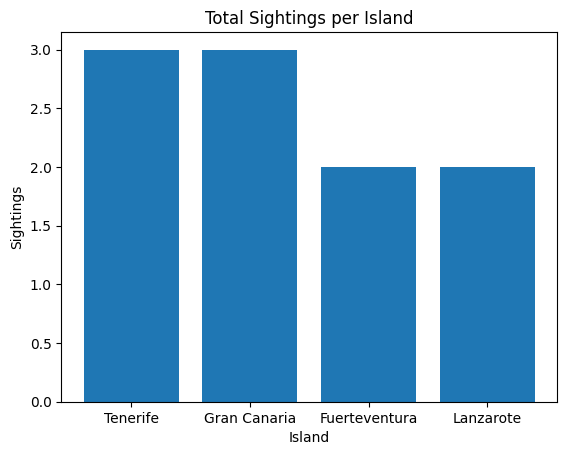

In [ ]:
# 26. 📊 Create a bar chart showing **the total number of turtle sightings per island**.
df = spark.sql("""
SELECT
    b.island,
    COUNT(*) AS total_sightings
FROM Sightings s
JOIN Beaches b ON s.beach_id = b.beach_id
GROUP BY b.island
ORDER BY total_sightings DESC
""").toPandas()

import matplotlib.pyplot as plt

plt.bar(df["island"], df["total_sightings"])
plt.title("Total Sightings per Island")
plt.xlabel("Island")
plt.ylabel("Sightings")
plt.show()


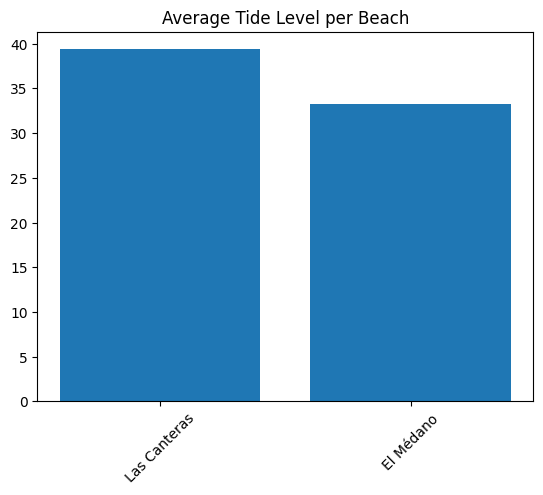

In [ ]:
# 27. 🌊 Plot the **average tide level per beach**, sorted from highest to lowest.
df = spark.sql("""
SELECT
    b.beach_name,
    AVG(sr.value) AS avg_tide
FROM SensorReadings sr
JOIN Sensors s ON sr.sensor_id = s.sensor_id
JOIN Beaches b ON s.beach_id = b.beach_id
WHERE s.sensor_type = 'tide'
GROUP BY b.beach_name
ORDER BY avg_tide DESC
""").toPandas()

plt.bar(df["beach_name"], df["avg_tide"])
plt.xticks(rotation=45)
plt.title("Average Tide Level per Beach")
plt.show()


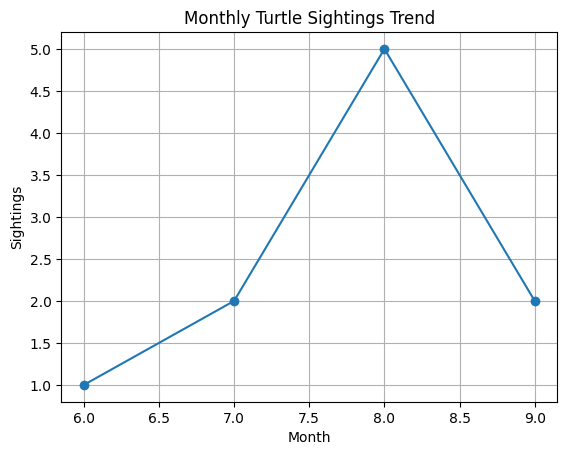

In [ ]:
# 28. 📅 Visualize the **monthly trend of turtle sightings** throughout the year.
df = spark.sql("""
SELECT
    MONTH(seen_at) AS month,
    COUNT(*) AS total_sightings
FROM Sightings
GROUP BY MONTH(seen_at)
ORDER BY month
""").toPandas()

plt.plot(df["month"], df["total_sightings"], marker="o")
plt.title("Monthly Turtle Sightings Trend")
plt.xlabel("Month")
plt.ylabel("Sightings")
plt.grid()
plt.show()


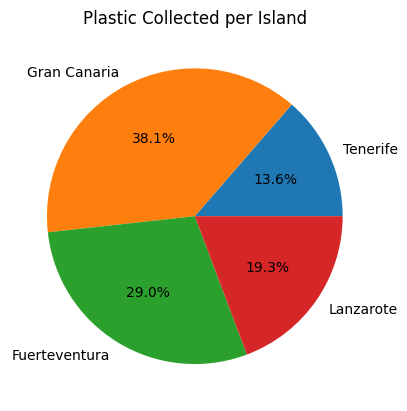

In [ ]:
# 29. 🧩 Build a pie chart showing the **percentage of plastic collected per island**.
df = spark.sql("""
SELECT
    b.island,
    SUM(p.kg_collected) AS total_kg
FROM PlasticCleanup p
JOIN Beaches b ON p.beach_id = b.beach_id
GROUP BY b.island
""").toPandas()

plt.pie(df["total_kg"], labels=df["island"], autopct="%1.1f%%")
plt.title("Plastic Collected per Island")
plt.show()

